# Pyber Ride Sharing
Pyber Exercise
written by: A. Lam

# Analysis:
- Observation 1:
- Observation 2:
- Observation 3:

# Setup

In [1]:
# Modules
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import raw data
city_data_path = os.path.join('..','Instructions','Pyber','raw_data','city_data.csv')
ride_data_path = os.path.join('..','Instructions','Pyber','raw_data','ride_data.csv')
city_data = pd.read_csv(city_data_path)
ride_data = pd.read_csv(ride_data_path)

In [3]:
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [7]:
# Join of data sources
all_data = pd.merge(city_data,ride_data,on='city')
all_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


# Bubble Plot of Ride Sharing Data
Include:
- Average Fare per City (y)
- Total Rides per City (x)
- Total Drivers per City (Bubble Size)
- City Type (Color)

In [8]:
# Create groupby over city
city_group = all_data.groupby(['city'])
bubble_data = pd.DataFrame({
    'Average Fare' : round(city_group['fare'].mean(),2),
    'Total Rides' : city_group['ride_id'].count(),
    'Total Drivers' : city_group['driver_count'].mean(), # should all be the same value per city
    'City Type' : city_group['type'].min() # should be identical per city
    })
bubble_data.head()

,Average Fare,City Type,Total Drivers,Total Rides
city,,,,
Alvarezhaven,23.93,Urban,21,31
Alyssaberg,20.61,Urban,67,26
Anitamouth,37.32,Suburban,16,9
Antoniomouth,23.62,Urban,21,22
Aprilchester,21.98,Urban,49,19


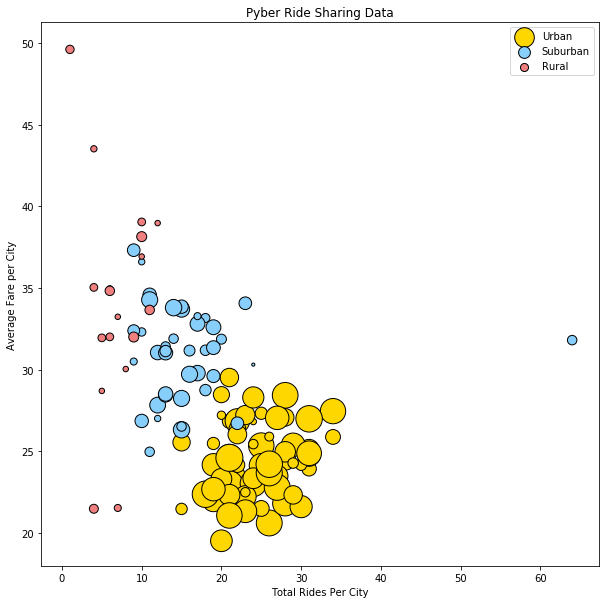

In [20]:
city_types = bubble_data['City Type'].unique()
colors = ['gold','lightskyblue','lightcoral']
# bubble_data.loc[bubble_data['City Type'] == city_types[0]]['Average Fare']
plt.figure(figsize = (10,10))
sf = 10 # scaling factor
for i in range(len(city_types)):
    x = bubble_data.loc[bubble_data['City Type'] == city_types[i]]['Total Rides']
    y = bubble_data.loc[bubble_data['City Type'] == city_types[i]]['Average Fare']
    size = bubble_data.loc[bubble_data['City Type'] == city_types[i]]['Total Drivers']
    plt.scatter(x, y, s = sf*size, color = colors[i], label = city_types[i], edgecolor = 'k')

plt.legend()
plt.title('Pyber Ride Sharing Data')
plt.xlabel('Total Rides Per City')
plt.ylabel('Average Fare per City')
plt.show()

# Total Fares by City Type

# Total Rides by City Type

# Total Drivers by City Type